In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\nbabic\Desktop\OMM\Data\3-solutioning\pandas_df2.csv')

C:\Users\nbabic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (9,14,16,17,19,20,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df2 = df.head(10).copy()
df2

,Unnamed: 0,Name,Product_ID,Product_UserTypeID,AT_MaraBshmCax3D,AT_MaraNtgew,AT_MaraVolum,AT_SAPID,AT_MaraMatkl,AT_MaraNumtp,...,AT_MaraLabor,AT_MaraExtwg,AT_MaraBismt,AT_MaraMeins,AT_MaraMtart,AT_MaraGroes,AT_LeadingSystem,AT_MaraNtgew_UnitID,AT_MaraVolum_UnitID,AT_MaraBrgew_UnitID
0,1,9001422279 - Lens Head Screw M4x8,MAT_928319,Material,60100004395930,1.300,0.0,9001422279,H002 - Customized screws,NaN,...,"H10 - FCGB Inserra, Bortolo",NaN,5750172759,piece(s),Materials which are externally procured,NaN,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM
1,2,9001730689 - CP body laser printed WT45HV14FR,MAT_928320,Material,NaN,0.318,0.0,9001730689,R239 - xxx - do not use anymore,prefabricated parts,...,WD0 - FLCD Default (FDW),NaN,9001452855,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
2,3,"9001730699 - USER MA. SE (WT45HV14FR), FR",MAT_928323,Material,NaN,0.020,0.0,9001730699,X810 - Printed material (general),NaN,...,WD0 - FLCD Default (FDW),NaN,9001452871,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
3,4,9001731054 - fascia panel GV650A.UC Int White...,MAT_928324,Material,60100007114130,0.000,0.0,9001731054,R250 - Injected parts (general),NaN,...,"G8A - FDG Neukirchner,Daniel",NaN,8001186041,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.GRM,unece.unit.CMQ,unece.unit.GRM
4,5,9001762412 - Cable Harness operat. EE 590 SP....,MAT_928325,Material,60100008886908,26.800,0.0,9001762412,L592 - IDC+IDC jumpers,NaN,...,"VBI - FCGB Schuhmacher, Jochen",NaN,NaN,piece(s),Materials which are externally procured,L 590MM,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM
5,6,9001762413 - Cable Harness operat. EE740mm SP....,MAT_928326,Material,60100008886908,28.700,0.0,9001762413,L592 - IDC+IDC jumpers,NaN,...,"VBI - FCGB Schuhmacher, Jochen",NaN,NaN,piece(s),Materials which are externally procured,L 740MM,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM
6,7,9001766218 - WIRE YELLOW-GREEN,MAT_928327,Material,NaN,0.000,0.0,9001766218,01 - Dummy,NaN,...,"H4W - FCGL Schmitt, Benoit",NaN,AJ00-0380,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
7,8,9001766289 - WIRE YELLOW-GREEN,MAT_928329,Material,NaN,0.000,0.0,9001766289,01 - Dummy,NaN,...,"H4W - FCGL Schmitt, Benoit",NaN,AJ00-0130A,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
8,9,9001766290 - WIRE YELLOW-GREEN,MAT_928331,Material,NaN,0.000,0.0,9001766290,01 - Dummy,NaN,...,"H4W - FCGL Schmitt, Benoit",NaN,AJ00-0130B,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
9,10,5090464588 - DOUGH HOOK MUM4 COMPL.,MAT_928333,Material,50910332140077,0.049,0.0,5090464588,H73S - Spare Parts Wire goods,NaN,...,CS0 - FNE default,NaN,427857,piece(s),Materials which can be potentially produced in...,S33 2 2 6 250,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM


Start code from here

In [6]:
# all preprocessing imports

import re
import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

# set Stopwords, add custom words/dictionary eventually
stopwords = set(STOPWORDS)
stopwords.update(["nan"])

def heavy_text_clean(x):
    # first lowercase everything
    x = x.lower()
    
    # further work on removing stopwords necessary, not working right now
    #x = ' '.join([word for word in x.split(' ') if word not in stopwords])
    
    # remove unicode characters
    x = x.encode('ascii', 'ignore').decode()
    
    # remove links
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'http*\S+', ' ', x)
    
    # remove @ symbols and hashtags
    x = re.sub(r'@\S', '', x)
    x = re.sub(r'#\S+', ' ', x)
    
    # remove whitespaces
    x = re.sub(r'\'\w+', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    
    x = re.sub(r'\w*\d+\w*', '', x)
    
    x = re.sub(r'\s{2,}', ' ', x)
    
    x = re.sub(r'\s[^\w\s]\s', '', x)
    
    # remove single letters and numbers surrounded by space
    x = re.sub(r'\s[a-z]\s|\s[0-9]\s', ' ', x)
    
    return x

In [7]:
# prepare dataframes

# join all columns into one
df2['text'] = df2.astype(str).agg(' '.join, axis=1)

df2 = df2.iloc[:,-1:]
df3 = df2.text.apply(heavy_text_clean)

In [8]:
display(df2.astype(str).text, df3)

0    1 9001422279 - Lens Head Screw M4x8 MAT_928319...
1    2 9001730689 - CP body laser printed WT45HV14F...
2    3 9001730699 - USER MA. SE (WT45HV14FR), FR MA...
3    4 9001731054 - fascia panel GV650A.UC Int  Whi...
4    5 9001762412 - Cable Harness operat. EE 590  S...
5    6 9001762413 - Cable Harness operat. EE740mm S...
6    7 9001766218 - WIRE YELLOW-GREEN MAT_928327 Ma...
7    8 9001766289 - WIRE YELLOW-GREEN MAT_928329 Ma...
8    9 9001766290 - WIRE YELLOW-GREEN MAT_928331 Ma...
9    10 5090464588 - DOUGH HOOK MUM4 COMPL. MAT_928...
Name: text, dtype: object

0     lens head screw mat material customized screw...
1     cp body laser printed mat material nan xxx do...
2     user ma se fr mat material nan printed materi...
3     fascia panel uc int white mat material inject...
4     cable harness operat ee sp mat material idc i...
5     cable harness operat sp mat material idc idc ...
6     wire yellow green mat material nan dummy nan ...
7     wire yellow green mat material nan dummy nan ...
8     wire yellow green mat material nan dummy nan ...
9     dough hook compl mat material spare parts wir...
Name: text, dtype: object

In [15]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def similarity_scores(df):
    #df: dataframe needs to have one column only
    
    #All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs
    model = SentenceTransformer('all-mpnet-base-v2')
    
    #Our sentences we like to encode
    sentences = list(df.astype(str))
    
    #Encode all sentences
    sentence_embeddings = model.encode(sentences)
    
    #init output matrix
    scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))
    
    for i in range(sentence_embeddings.shape[0]):
        #Compute cosine similarity between all pairs
        scores[i, :] = cosine_similarity([sentence_embeddings[i]], sentence_embeddings)[0]
        
    return scores

C:\Users\nbabic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


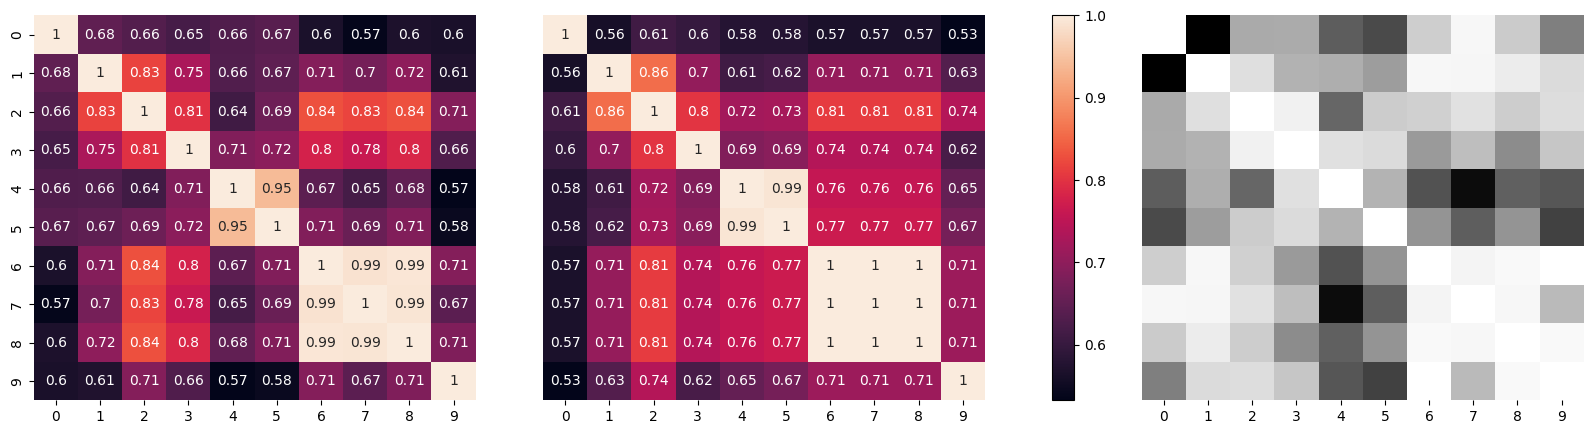

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# calculate similarity scores of dataframe.text
scores = similarity_scores(df2.text) #no cleaning 
scores_pre = similarity_scores(df3) #heavy cleaning

# find min, max values from similarity matrix for plotting
vmin = min(scores.min(), scores_pre.min())
vmax = max(scores.max(), scores_pre.max())

# set subplots layout
fig, axs = plt.subplots(ncols=4, gridspec_kw={"width_ratios":[10,10,0.5,10]}, figsize=(20, 5))

# create subplots
sns.heatmap(scores, annot=True, cbar=False, ax=axs[0])
sns.heatmap(scores_pre, annot=True, yticklabels=False, cbar=False, ax=axs[1])
sns.heatmap(abs(scores-scores_pre), yticklabels=False, cbar=False, ax=axs[3], cmap="Greys")

# add colorbar
fig.colorbar(axs[1].collections[0], cax=axs[2])

# plot
plt.show()